In [1]:

import yfinance as yf   
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:

# Fetch historical data for NVDA
nvda_data = yf.download('NVDA', start='2010-01-01', end='2024-01-25')
nvda_data['SMA_50'] = nvda_data['Close'].rolling(window=50).mean()
nvda_data['SMA_200'] = nvda_data['Close'].rolling(window=200).mean()
nvda_data.dropna(inplace=True)  # Remove rows with NaN values
nvda_data['Target'] = (nvda_data['Close'].shift(-1) > nvda_data['Close']).astype(int)
nvda_data.dropna(inplace=True)  # Ensure no NaNs are present for targets


[*********************100%%**********************]  1 of 1 completed


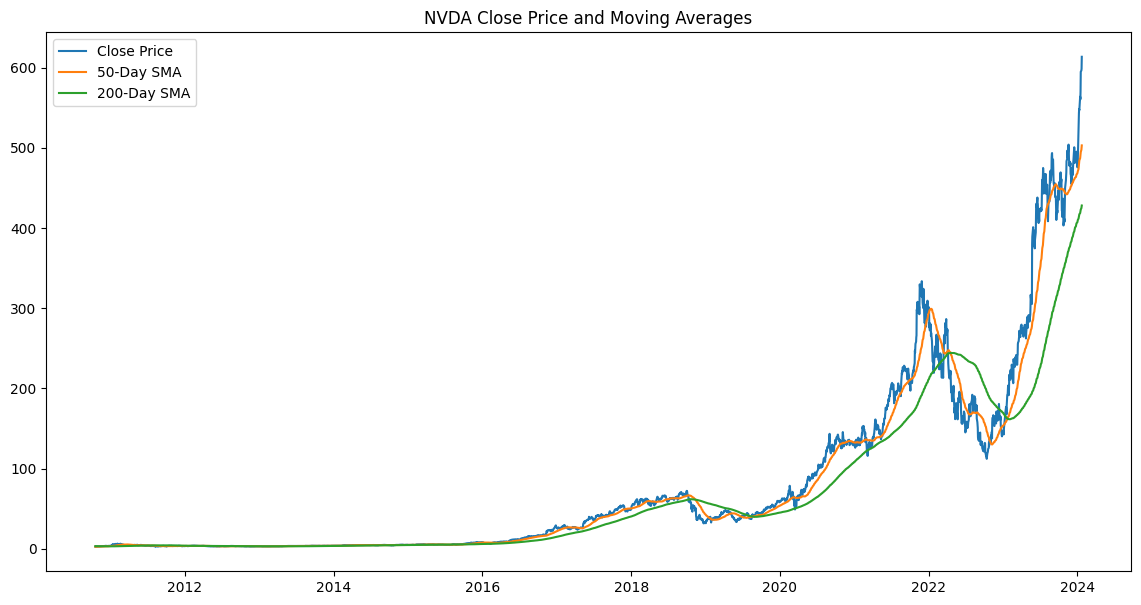

In [3]:

# Plot closing price and moving averages
plt.figure(figsize=(14,7))
plt.plot(nvda_data['Close'], label='Close Price')
plt.plot(nvda_data['SMA_50'], label='50-Day SMA')
plt.plot(nvda_data['SMA_200'], label='200-Day SMA')
plt.title('NVDA Close Price and Moving Averages')
plt.legend()
plt.show()


In [4]:

# Select features and target
features = ['Close', 'Volume', 'SMA_50', 'SMA_200']
X = nvda_data[features]
y = nvda_data['Target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.48      0.51       295
           1       0.56      0.61      0.59       320

    accuracy                           0.55       615
   macro avg       0.55      0.55      0.55       615
weighted avg       0.55      0.55      0.55       615

[[142 153]
 [124 196]]
